<a href="https://colab.research.google.com/github/agrim1989/DataScience-2024/blob/main/data_science_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [2]:
df.tail()

,date,state,fips,cases,deaths
61937,2023-03-23,Virginia,51,2298300,23782
61938,2023-03-23,Washington,53,1940704,15905
61939,2023-03-23,West Virginia,54,645710,8132
61940,2023-03-23,Wisconsin,55,2014524,16485
61941,2023-03-23,Wyoming,56,185800,2014


In [3]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [4]:
df.shape

(61942, 5)

##EDA

In [5]:
df.describe()

,fips,cases,deaths
count,61942.000000,6.194200e+04,61942.000000
mean,32.247958,8.898301e+05,11779.067499
std,18.788383,1.470231e+06,17345.774849
min,1.000000,1.000000e+00,0.000000
25%,17.000000,7.078350e+04,1171.000000
50%,31.000000,3.514960e+05,5035.000000
75%,46.000000,1.043231e+06,14912.000000
max,78.000000,1.216916e+07,104277.000000


*Cases and Deaths in the USA due to Covid-19*

<Axes: xlabel='cases', ylabel='deaths'>

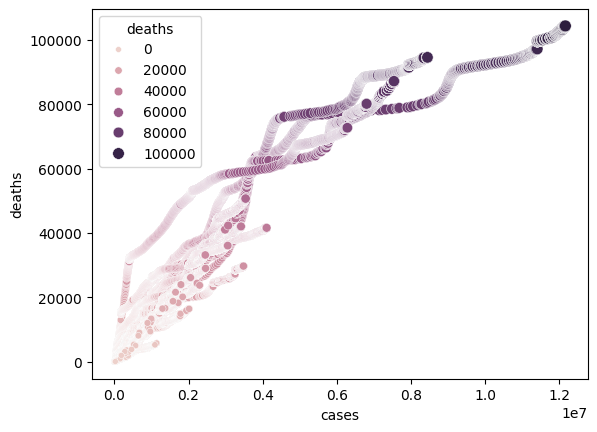

In [6]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths",
                hue="deaths",size="deaths", data=df)

### Date-based EDA

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23'],
              dtype='datetime64[ns]', name='date', length=61942, freq=None)

*Filter results by date range*

In [24]:
from datetime import date, timedelta
today = date.today() - timedelta(days = 730)
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2022-04-10
Two days ago 2022-04-08


In [25]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2022-04-08,Alabama,1,1296730,19376
2022-04-08,Alaska,2,247078,1192
2022-04-08,American Samoa,60,4957,8
2022-04-08,Arizona,4,2014020,29681
2022-04-08,Arkansas,5,833595,11301


*The distribution of the data by date*

<ipython-input-26-726bc3c8339e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)


<Axes: xlabel='deaths', ylabel='Density'>

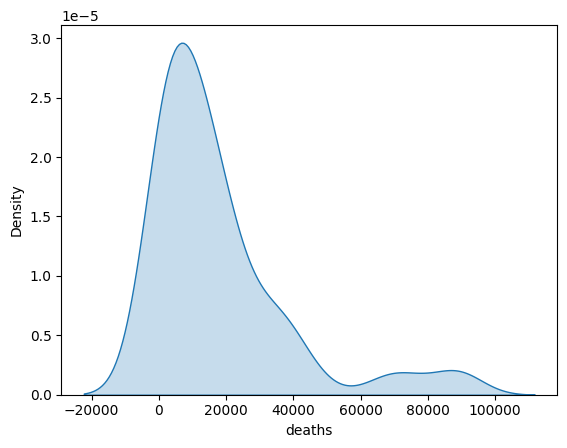

In [26]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

*Sort DataFrame in place by states with highest deaths and cases and show first 10 results*

In [27]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2022-04-10,California,6,9132019,89438
2022-04-09,California,6,9132019,89429
2022-04-08,California,6,9132016,89426
2022-04-10,Texas,48,6705343,87796
2022-04-09,Texas,48,6704471,87796
2022-04-08,Texas,48,6701915,87747
2022-04-09,Florida,12,5864866,73555
2022-04-10,Florida,12,5864866,73555
2022-04-08,Florida,12,5862817,73538


*There should be 50 states and District of Columbia*

In [28]:
current_df.shape

(168, 4)

### State Based Analysis

* *italicized text *Get 10 states and subset*

In [29]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['California',
 'California',
 'California',
 'Texas',
 'Texas',
 'Texas',
 'Florida',
 'Florida',
 'Florida',
 'New York']

In [31]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [32]:
set(top_states_df.state.values)

{'California', 'Florida', 'New York', 'Texas'}

<Figure size 1500x500 with 0 Axes>

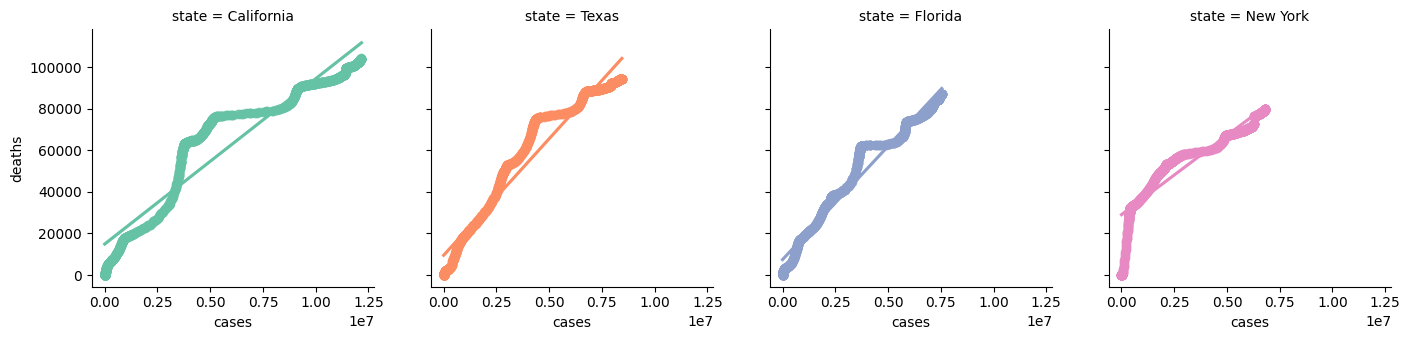

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state",
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

*Interactive plot of top states*

In [34]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=True)
top_states_march_current_df.head()

,state,cases,deaths
date,,,
2020-03-08,Texas,23,0
2020-03-09,Texas,24,0
2020-03-10,Texas,31,0
2020-03-11,Texas,33,0
2020-03-12,Texas,41,0


In [35]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_march_current_df, x=top_states_march_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

### Search for Features:  Political, Health and Finance

*Sugar Intake By State*

In [40]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/master/data/education_sugar_cdc_2003.csv")
cdc_2013.set_index("State", inplace=True)
for column in cdc_2013.columns:
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","", regex=True)
  print(cdc_2013[column])
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])

cdc_2013.reset_index(inplace=True)
cdc_2013.rename(columns={"State": "state", "Employed": "employed-sugar-intake-daily"},inplace=True)
cdc_2013.head()

State
Alaska                  26.2 
Arizona                 33.0 
California              22.9 
Connecticut             18.9 
District of Columbia    18.5 
Indiana                 35.9 
Iowa                    34.2 
Kansas                  32.4 
Kentucky                43.4 
Louisiana               46.9 
Maryland                28.0 
Minnesota               23.5 
Mississippi             49.7 
Nebraska                31.1 
New Jersey              22.7 
New York                23.1 
North Carolina          42.1 
Ohio                    32.0 
Oklahoma                46.5 
South Carolina          42.0 
Utah                    30.3 
Vermont                 16.7 
West Virginia           46.1 
Wisconsin               29.7 
Name: Employed, dtype: object
State
Alaska                  32.1 
Arizona                 28.7 
California              30.2 
Connecticut             24.3 
District of Columbia    34.6 
Indiana                 40.5 
Iowa                    33.1 
Kansas                  35.3

,state,employed-sugar-intake-daily,Not employed,Retired,<High school,High school,Some college,College graduate
0,Alaska,26.2,32.1,16.0,47.1,34.9,24.2,12.9
1,Arizona,33.0,28.7,13.8,40.4,36.5,24.4,14.6
2,California,22.9,30.2,15.0,38.5,29.9,21.4,11.5
3,Connecticut,18.9,24.3,15.0,27.8,26.9,19.9,10.2
4,District of Columbia,18.5,34.6,18.5,45.6,39.0,28.9,8.4


0                    26.2 
1    This is another test 
2      no parenthesis here
dtype: object


*Combine Sugar Data and Covid-19 Data*

In [42]:
cdc_employed_df = cdc_2013[["employed-sugar-intake-daily", "state"]]
sugar_covid_df = df.merge(cdc_employed_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily
0,California,6,1,0,22.9
1,California,6,2,0,22.9
2,California,6,2,0,22.9
3,California,6,2,0,22.9
4,California,6,2,0,22.9


In [43]:
election_df = pd.read_csv("https://raw.githubusercontent.com/paiml/minimal-python/master/data/2016-Electoral-Votes.csv")
election_df.rename(columns={"State": "state"},inplace=True)
election_df.drop(columns="Votes", inplace=True)
election_df = pd.concat([election_df, pd.get_dummies(election_df["Winning Party"])], axis=1);
election_df.head()
#election_df["Republican?"] = pd.get_dummies(election_df, columns=["Winning Party"])
#election_df.head()

,state,Winning Party,Democrats,Republicans
0,Alabama,Republicans,False,True
1,Alaska,Republicans,False,True
2,Arizona,Republicans,False,True
3,Arkansas,Republicans,False,True
4,California,Democrats,True,False


In [44]:
sugar_covid_df = sugar_covid_df.merge(election_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily,Winning Party,Democrats,Republicans
0,California,6,1,0,22.9,Democrats,True,False
1,California,6,2,0,22.9,Democrats,True,False
2,California,6,2,0,22.9,Democrats,True,False
3,California,6,2,0,22.9,Democrats,True,False
4,California,6,2,0,22.9,Democrats,True,False


*Generate Heatmap*

In [46]:
sugar_covid_df

,state,fips,cases,deaths,employed-sugar-intake-daily,Winning Party,Democrats,Republicans
0,California,6,1,0,22.9,Democrats,True,False
1,California,6,2,0,22.9,Democrats,True,False
2,California,6,2,0,22.9,Democrats,True,False
3,California,6,2,0,22.9,Democrats,True,False
4,California,6,2,0,22.9,Democrats,True,False
...,...,...,...,...,...,...,...,...
25712,West Virginia,54,644682,8126,46.1,Republicans,False,True
25713,West Virginia,54,644682,8126,46.1,Republicans,False,True
25714,West Virginia,54,644682,8126,46.1,Republicans,False,True
25715,West Virginia,54,645710,8132,46.1,Republicans,False,True


In [48]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=sugar_covid_df,
                   x=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   y=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   hoverongaps = False))
fig.show()

In [50]:
sugar_covid_df.to_csv("covid-eda.csv")

*What about data from the 2016 Election?*

##Modeling

##Conclusion